![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [260]:
# Re-run this cell 
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

# Start coding here...
# Add as many cells as you like...

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


**0.- QUICK EXPLORATORY ANALYSIS.**

In [261]:
## Dataset shape and info

print(schools.shape)
print(schools.info())

(375, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB
None


In [262]:
## Review of null values

print(schools["percent_tested"].isnull().sum())

20


**1.- WHICH NYC SCHOOLS HAVE THE BEST MATH RESULTS?**

The best math results are at least 80% of the *maximum possible score of 800* for math.

In [263]:
max_score = 800
math_max_score = schools[schools["average_math"] >= 0.8 * max_score]
school_math_max_score = math_max_score.loc[:, ["school_name", "average_math"]]
best_math_schools = school_math_max_score.sort_values("average_math", ascending=False)
print(best_math_schools)

                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641


In [264]:
print(int(best_math_schools.shape[0]))

10


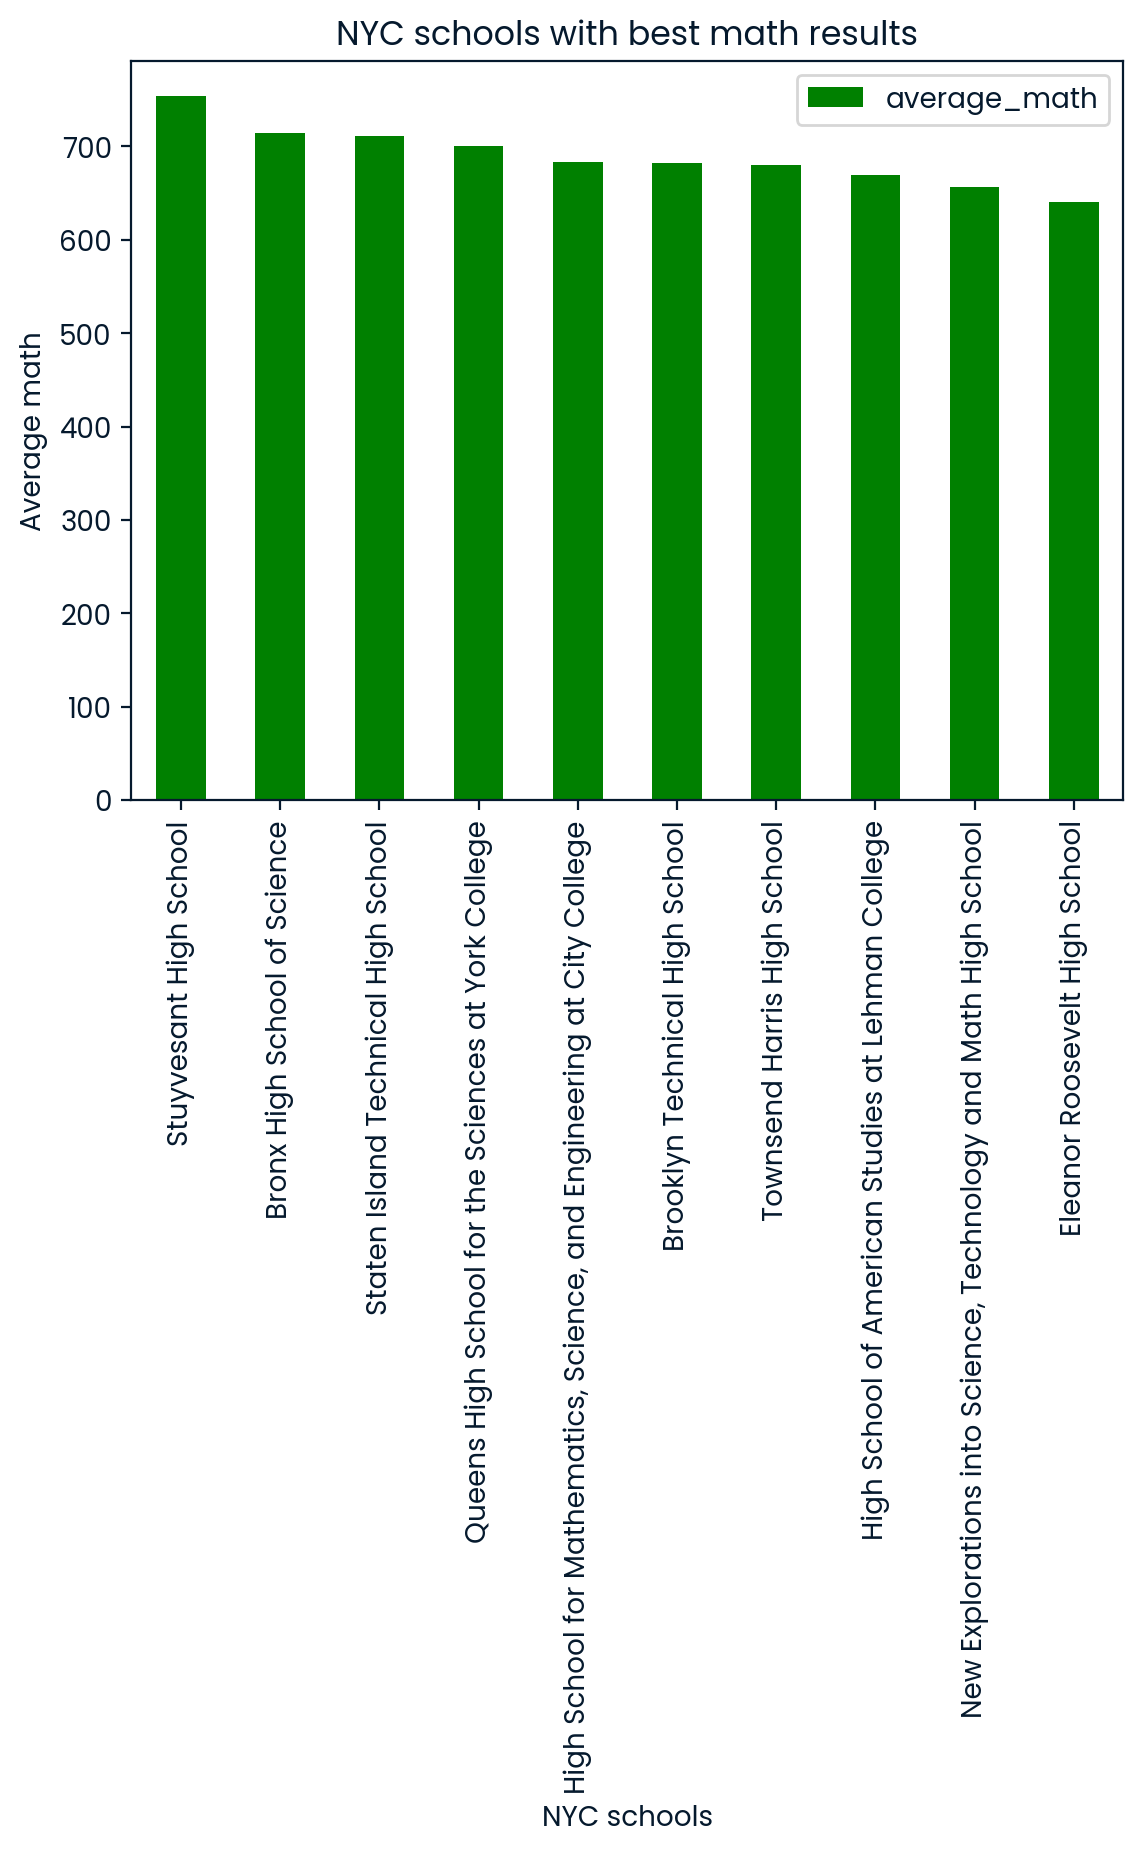

In [265]:
best_math_schools.plot(kind="bar", x="school_name", y="average_math", color="green")

plt.xlabel("NYC schools")
plt.ylabel("Average math")
plt.title("NYC schools with best math results")

plt.show()

**2.- WHAT ARE THE TOP 10 PERFORMING SCHOOLS BASED ON THE COMBINED SAT SCORES?**

In [266]:
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]
print(schools["total_SAT"].head(6))

0    1859
1    1193
2    1261
3    1529
4    1197
5    1914
Name: total_SAT, dtype: int64


In [267]:
top_schools = schools.loc[:,["school_name", "total_SAT"]].sort_values("total_SAT", ascending=False)
top_10_schools = top_schools[0:10]
print(top_10_schools)

                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889


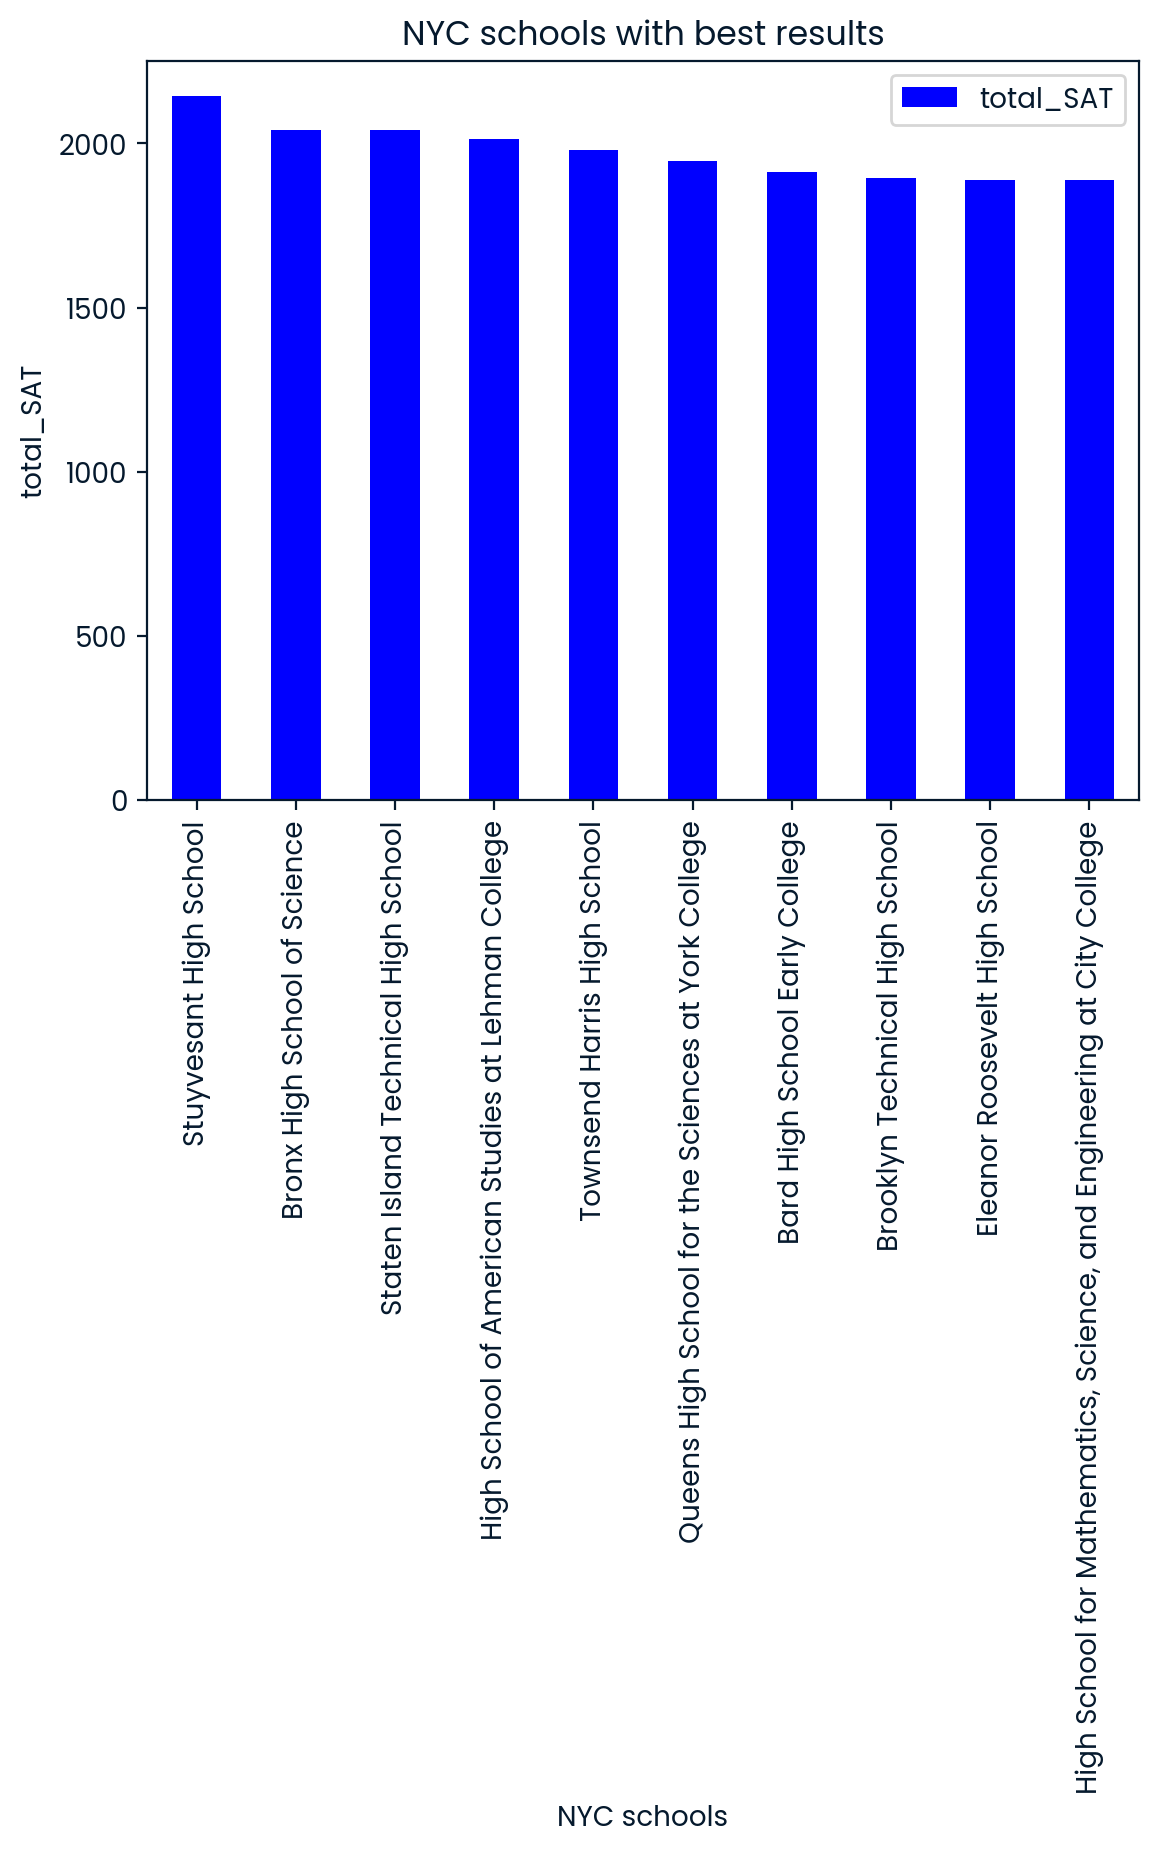

In [268]:
top_10_schools[0:10].plot(kind="bar", x="school_name", y="total_SAT", color="blue")

plt.xlabel("NYC schools")
plt.ylabel("total_SAT")
plt.title("NYC schools with best results")

plt.show()

**3.- WHICH SINGLE BOROUGH HAS THE LARGEST STANDARD DEVIATION IN THE COMBINED SAT SCORE?**

In [269]:
borough = schools["borough"].unique()
print(borough)

['Manhattan' 'Staten Island' 'Bronx' 'Queens' 'Brooklyn']


In [270]:
num_schools = schools.groupby("borough").agg("count")["school_name"]
print(num_schools)

borough
Bronx             98
Brooklyn         109
Manhattan         89
Queens            69
Staten Island     10
Name: school_name, dtype: int64


In [271]:
average_SAT = schools.groupby("borough").mean().round(2)["total_SAT"]
print(average_SAT)

borough
Bronx            1202.72
Brooklyn         1230.26
Manhattan        1340.13
Queens           1345.48
Staten Island    1439.00
Name: total_SAT, dtype: float64


In [272]:
std_SAT = schools.groupby("borough").std().round(2)["total_SAT"]
print(std_SAT)

borough
Bronx            150.39
Brooklyn         154.87
Manhattan        230.29
Queens           195.25
Staten Island    222.30
Name: total_SAT, dtype: float64


In [273]:
data = {
    "borough": borough,
    "num_schools": num_schools,
    "average_SAT": average_SAT,
    "std_SAT": std_SAT
}
std_dev_df = pd.DataFrame(data, columns=["num_schools", "average_SAT", "std_SAT"])
print(std_dev_df)

               num_schools  average_SAT  std_SAT
borough                                         
Bronx                   98      1202.72   150.39
Brooklyn               109      1230.26   154.87
Manhattan               89      1340.13   230.29
Queens                  69      1345.48   195.25
Staten Island           10      1439.00   222.30


In [274]:
std_dev_df_sort = std_dev_df.sort_values("std_SAT", ascending=False)
print(std_dev_df_sort)

               num_schools  average_SAT  std_SAT
borough                                         
Manhattan               89      1340.13   230.29
Staten Island           10      1439.00   222.30
Queens                  69      1345.48   195.25
Brooklyn               109      1230.26   154.87
Bronx                   98      1202.72   150.39


In [275]:
largest_std_dev = std_dev_df_sort.iloc[[0]]
print(largest_std_dev)

           num_schools  average_SAT  std_SAT
borough                                     
Manhattan           89      1340.13   230.29


In [276]:
## Other interesting data
schools[["average_math", "average_reading", "average_writing"]].std() 

average_math       71.952373
average_reading    61.881069
average_writing    64.548599
dtype: float64